In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score

# read data
df = pd.read_csv('Student_performance_data _.csv',header='infer')

In [34]:
df.info    

<bound method DataFrame.info of       StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tut

In [35]:
df.head(10)

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   
5       1006   18       0          0                  1         8.191219   
6       1007   15       0          1                  1        15.601680   
7       1008   15       1          1                  4        15.424496   
8       1009   17       0          0                  0         4.562008   
9       1010   16       1          0                  1        18.444466   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   
5         0         0                1                1       0      0   
6        10         0                3                0       1      0   
7        22         1                1                1       0      0   
8         1         0                2                0       1      0   
9         0         0                3                1       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3.042915         1.0  
2             0  0.112602         4.0  
3             0  2.054218         3.0  
4             0  1.288061         4.0  
5             0  3.084184         1.0  
6             0  2.748237         2.0  
7             0  1.360143         4.0  
8             1  2.896819         2.0  
9             0  3.573474         0.0

In [36]:
df.describe()

StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971         1.122813   
min           0.001057     0.000000     0.000000         0.000000   
25%           5.043079     7.000000     0.000000         1.000000   
50%           9.705363    15.000000     0.000000         2.000000   
75%          14.408410    22.000000     1.000000         3.000000   
max          19.978094    29.000000     1.000000         4.000000   

       Extracurricular       Sports        Music  Volunteering          GPA  \
count      2392.000000  2392.000000  2392.000000   2392.000000  2392.000000   
mean          0.383361     0.303512     0.196906      0.157191     1.906186   
std           0.486307     0.459870     0.397744      0.364057     0.915156   
min           0.000000     0.000000     0.000000      0.000000     0.000000   
25%           0.000000     0.000000     0.000000      0.000000     1.174803   
50%           0.000000     0.000000     0.000000      0.000000     1.893393   
75%           1.000000     1.000000     0.000000      0.000000     2.622216   
max           1.000000     1.000000     1.000000      1.000000     4.000000   

        GradeClass  
count  2392.000000  
mean      2.983696  
std       1.233908  
min       0.000000  
25%       2.000000  
50%       4.000000  
75%       4.000000  
max       4.000000

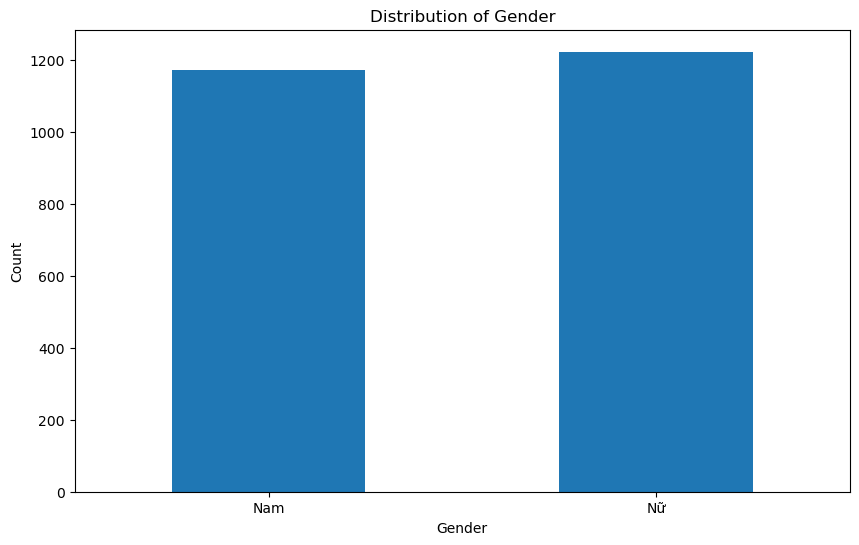

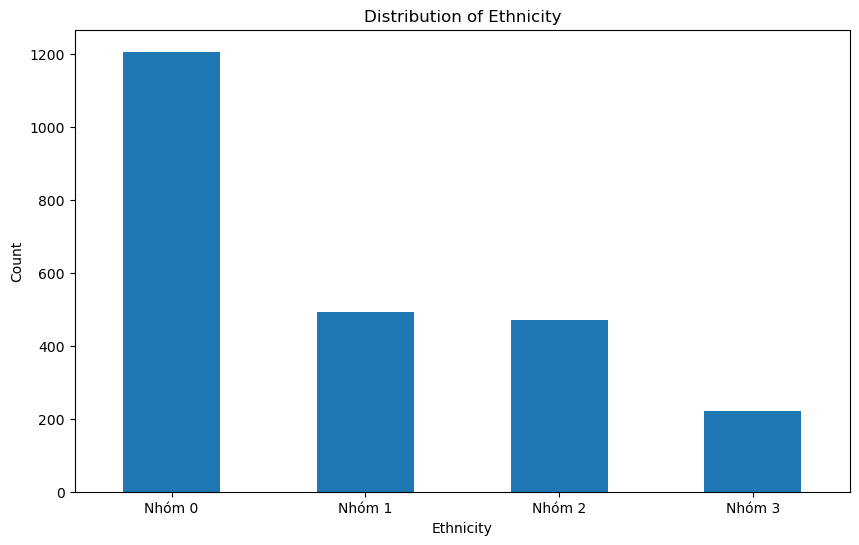

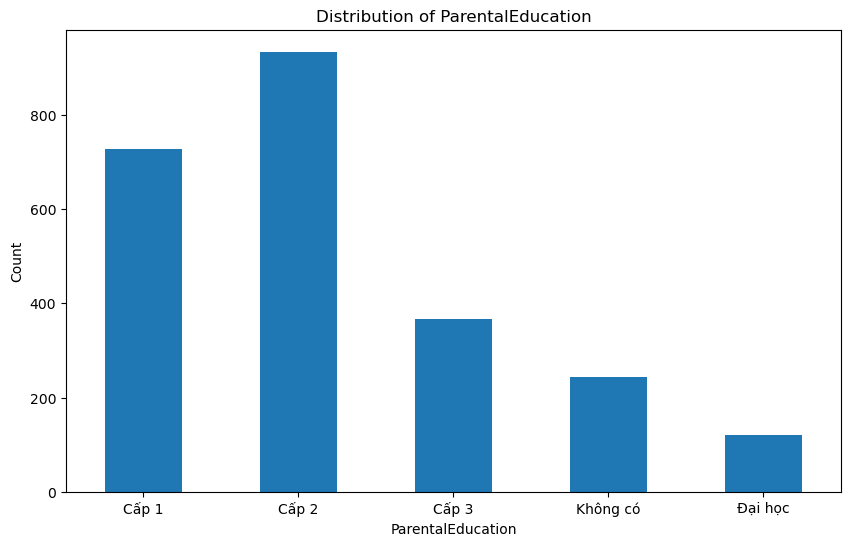

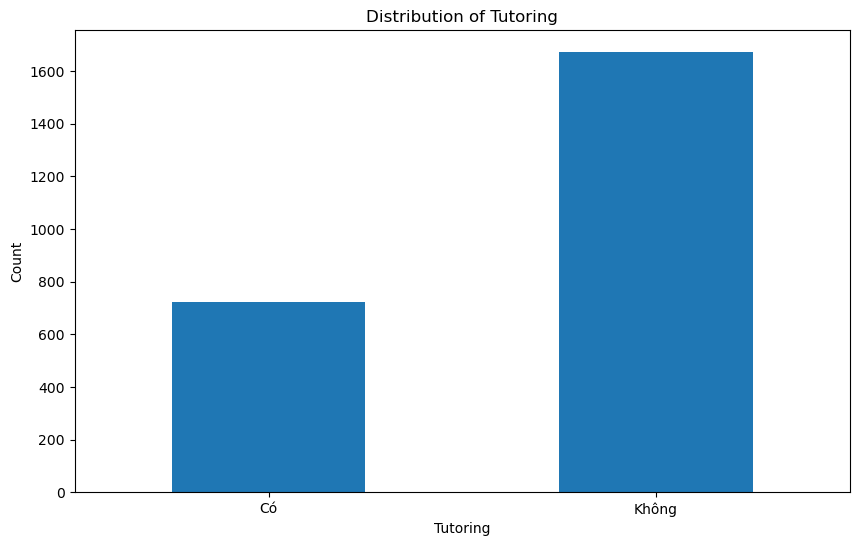

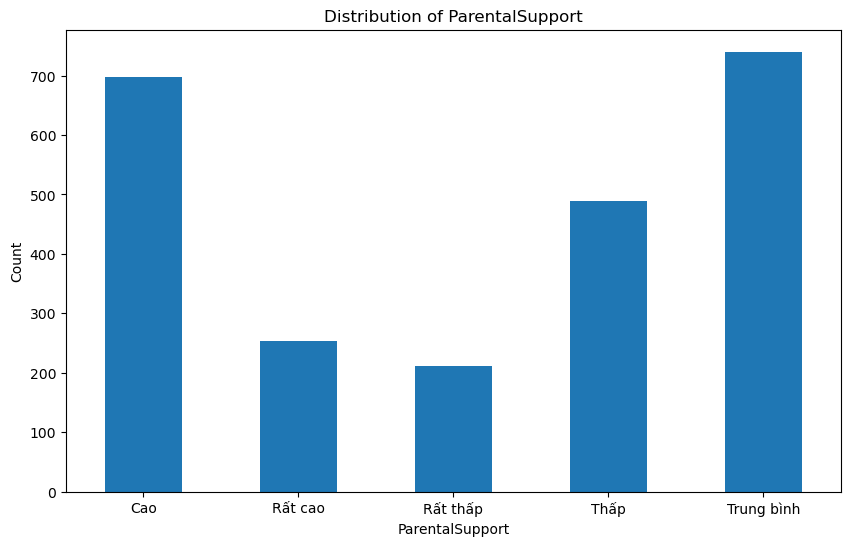

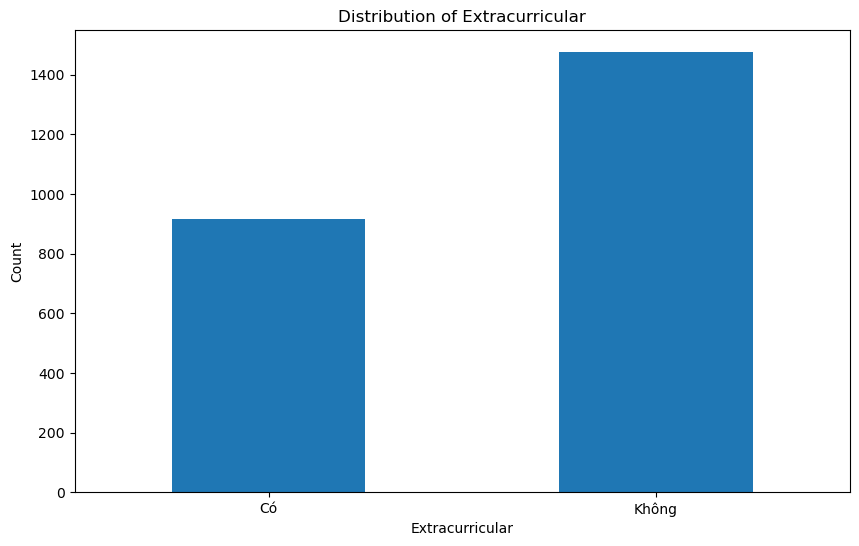

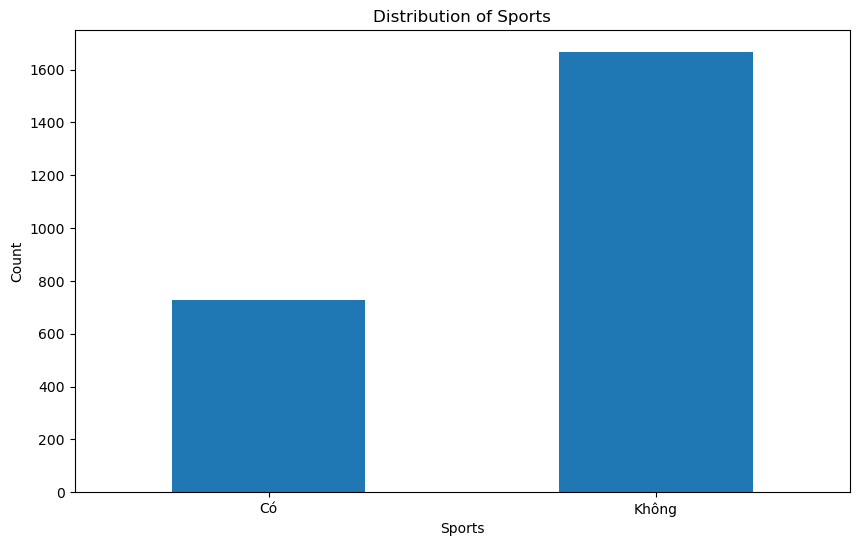

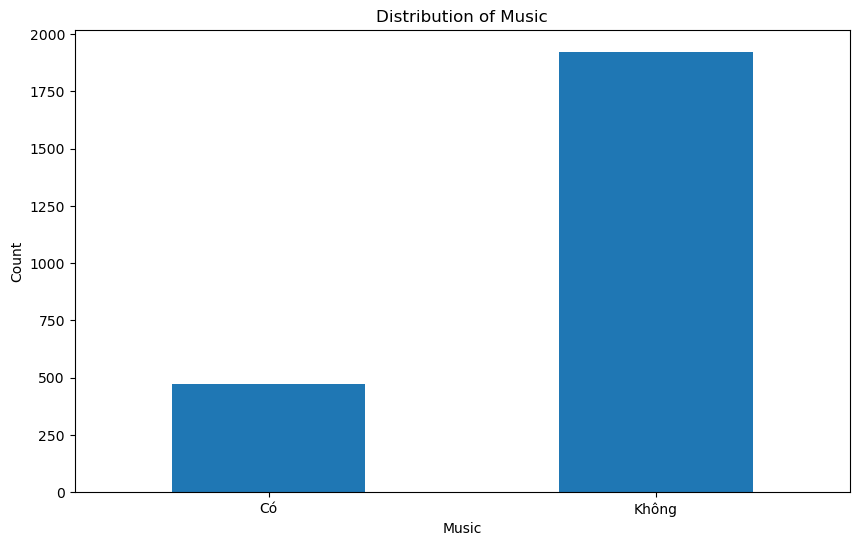

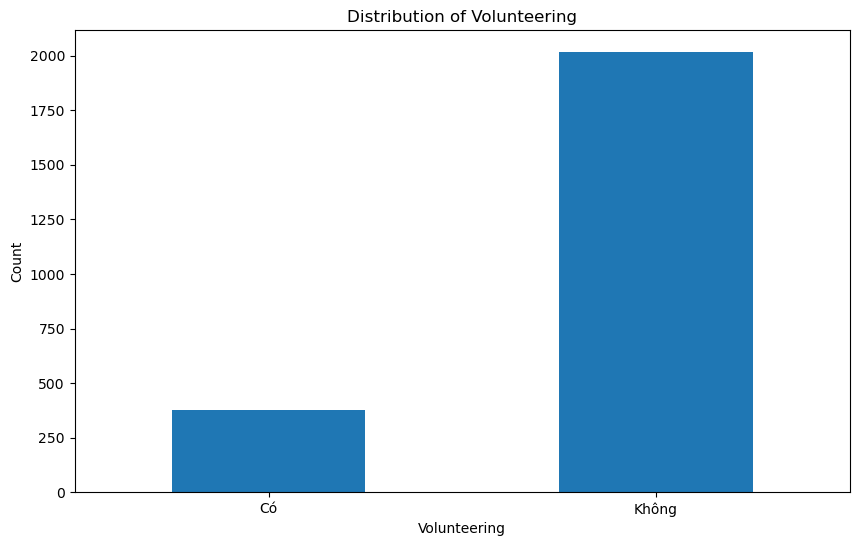

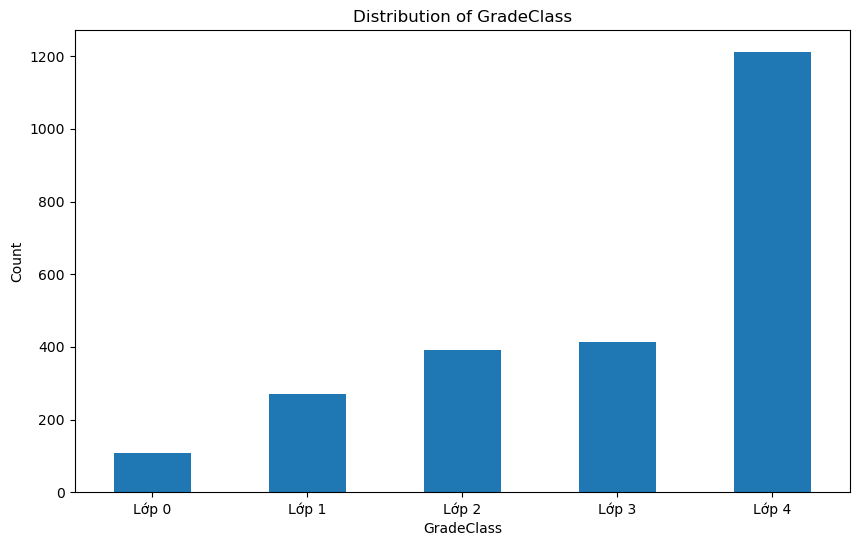

In [37]:
label_dict = {
    'Gender': {0: 'Nam', 1: 'Nữ'},
    'Ethnicity': {0: 'Nhóm 0', 1: 'Nhóm 1', 2: 'Nhóm 2', 3: 'Nhóm 3'},
    'ParentalEducation': {0: 'Không có', 1: 'Cấp 1', 2: 'Cấp 2', 3: 'Cấp 3', 4: 'Đại học'},
    'Tutoring': {0: 'Không', 1: 'Có'},
    'ParentalSupport': {0: 'Rất thấp', 1: 'Thấp', 2: 'Trung bình', 3: 'Cao', 4: 'Rất cao'},
    'Extracurricular': {0: 'Không', 1: 'Có'},
    'Sports': {0: 'Không', 1: 'Có'},
    'Music': {0: 'Không', 1: 'Có'},
    'Volunteering': {0: 'Không', 1: 'Có'},
    'GradeClass': {0: 'Lớp 0', 1: 'Lớp 1', 2: 'Lớp 2', 3: 'Lớp 3', 4: 'Lớp 4'}
    }
categorical_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 
                        'ParentalSupport', 'Extracurricular', 'Sports', 
                        'Music', 'Volunteering', 'GradeClass']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    df[feature].map(label_dict[feature]).value_counts().sort_index().sort_index().plot(kind='bar')
    plt.title( f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

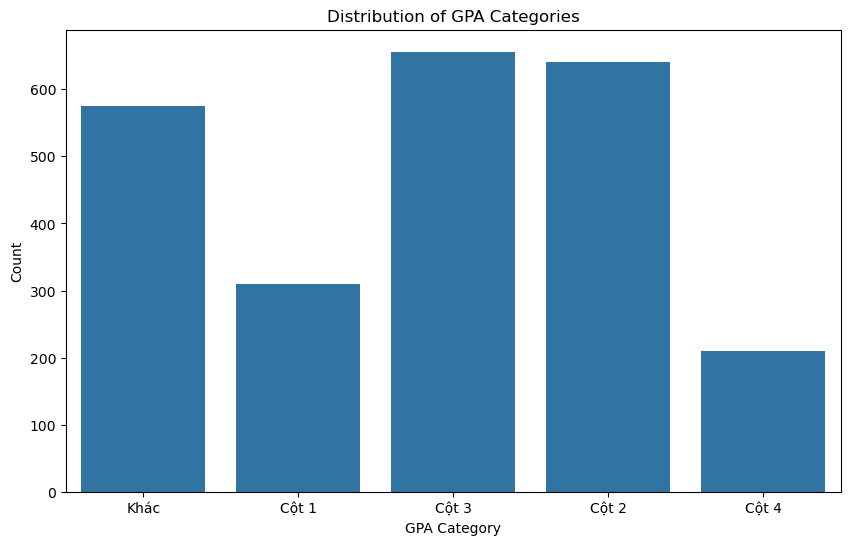

In [38]:
def categorize_gpa(gpa):
    if gpa <= 0.8:
        return 'Cột 1'
    elif 0.8 < gpa <= 1.6:
        return 'Cột 2'
    elif 1.6 < gpa <= 2.4:
        return 'Cột 3'
    elif gpa > 3.2:
        return 'Cột 4'
    else:
        return 'Khác'

df['GPA_Category'] = df['GPA'].apply(categorize_gpa)

# Trực quan hóa phân phối của các nhóm GPA
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='GPA_Category')
plt.title('Distribution of GPA Categories')
plt.xlabel('GPA Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

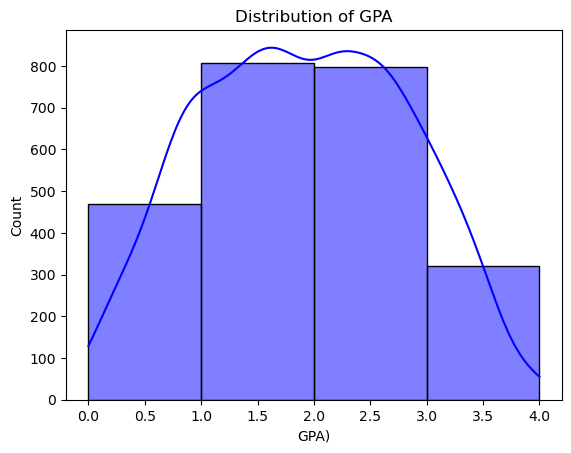

<bound method DataFrame.count of       StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2385       3386   16       1          0                  1         1.445434   
2386       3387   16       0          0                  2        13.814021   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tu

In [39]:
# Distribution of GPA
sns.histplot(df['GPA'], bins=4, kde=True, color='blue')
plt.title('Distribution of GPA')
plt.xlabel('GPA)')
plt.ylabel('Count')
plt.show()

# check how many student has GPA lower 3.2
print(df[df['GPA'] <= 3.2].count) # => 2182 / 2392

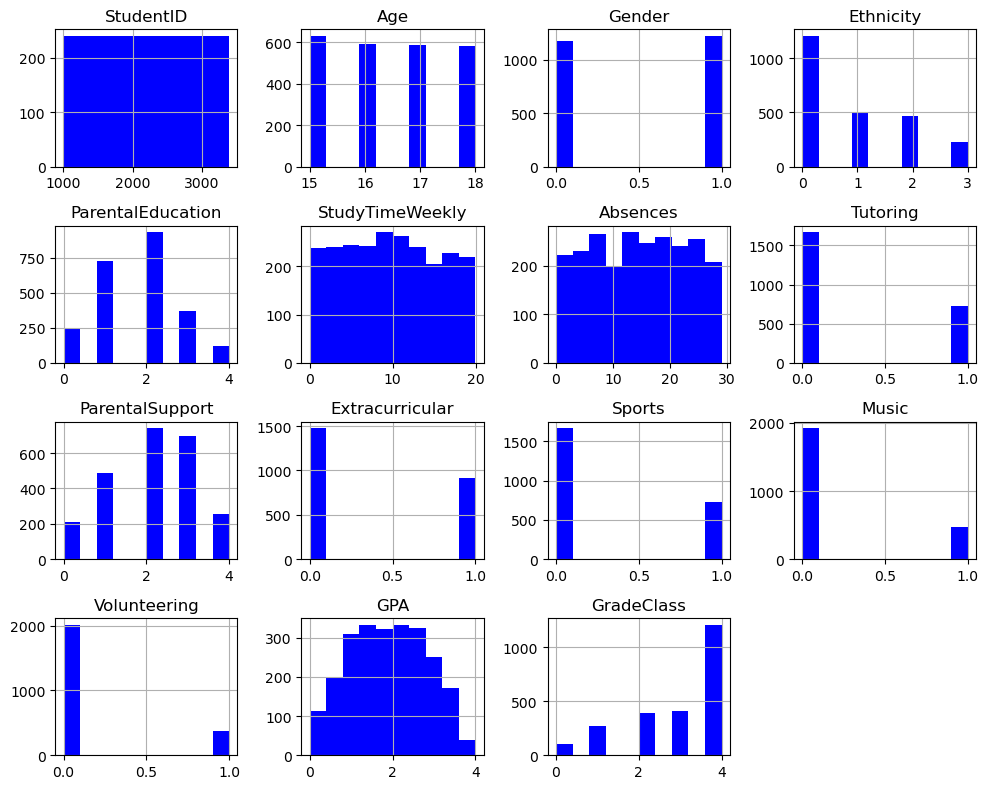

In [40]:
# df.drop('StudentID', axis=1, inplace=True)
# Sumary barchar
# Select numerical data
numerical_data = df.select_dtypes(include='number')

# Plot histograms
numerical_data.hist(figsize=(10, 8), color='b')
plt.tight_layout()
plt.show()

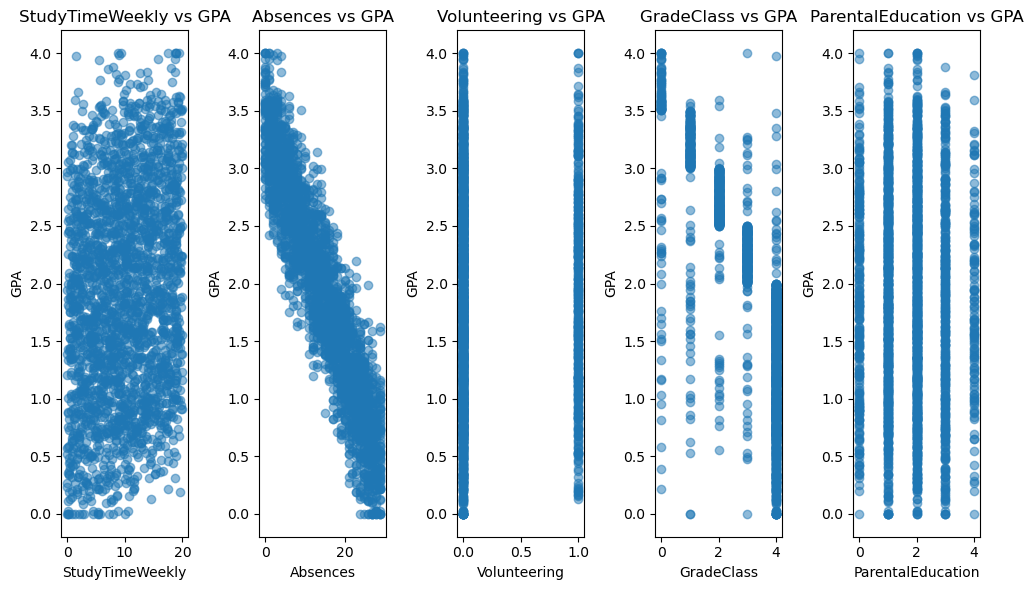

In [41]:
# 2. Phân Tích Dữ Liệu - Biểu Đồ Scatter Phân Bố Dữ Liệu Target
target = 'GPA'
features_to_compare = ['StudyTimeWeekly', 'Absences', 'Volunteering', 'GradeClass','ParentalEducation']
plt.figure(figsize=(10, 6))
for i, feature in enumerate(features_to_compare, 1):
    plt.subplot(1, 5, i)
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
plt.tight_layout()
plt.show()

Cross-validation scores: [0.92167102 0.91906005 0.95039164 0.91099476 0.91623037]
Mean Cross-validation score: 0.9236695692589503
Test set accuracy: 0.9144050104384134


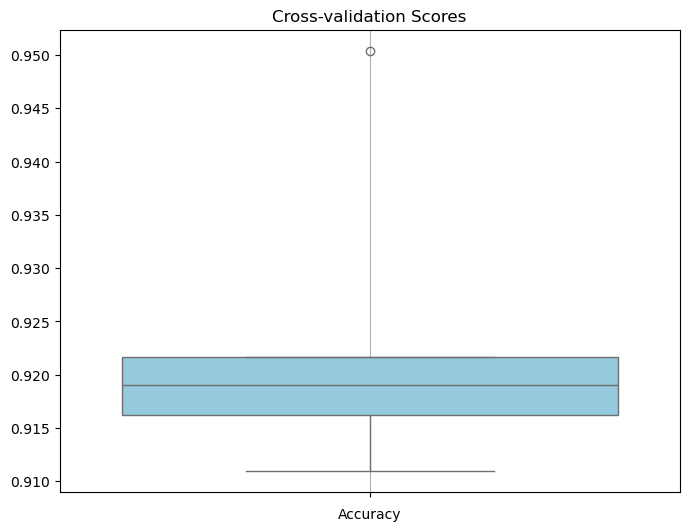

In [44]:

X = df.drop(columns=['GradeClass', 'StudentID'])  
y = df['GradeClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean Cross-validation score: {cv_scores.mean()}")
print(f"Test set accuracy: {test_accuracy}")
plt.figure(figsize=(8, 6))
sns.boxplot(cv_scores, color='skyblue')
plt.title('Cross-validation Scores')
plt.xlabel('Accuracy')
plt.grid(True, axis='x')
plt.show()

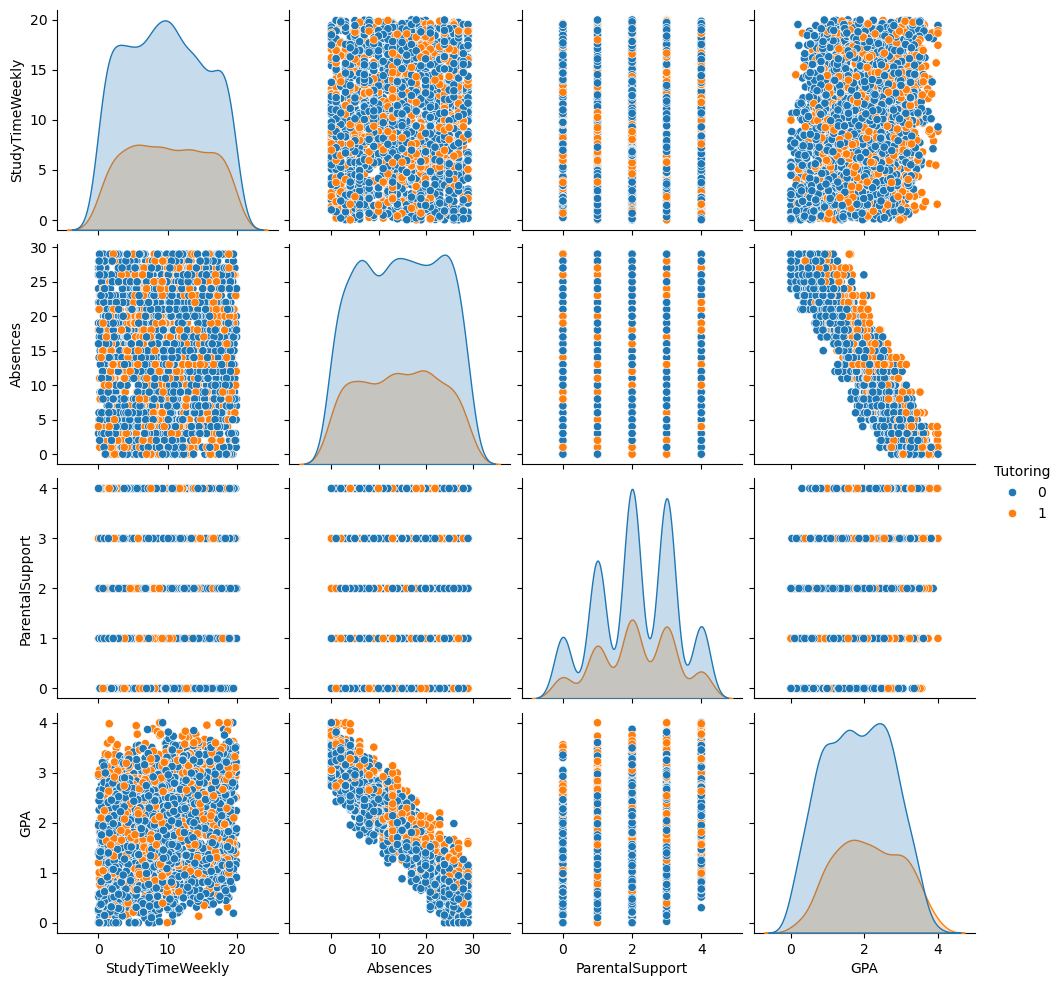

In [45]:
cols = ['StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'GPA']
df_pair = df[cols]
sns.pairplot(df_pair, hue='Tutoring')
plt.show()

Test set accuracy: 0.9144050104384134

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.50      0.63        22
         1.0       0.83      0.88      0.85        49
         2.0       0.94      0.87      0.90        85
         3.0       0.89      0.90      0.89        86
         4.0       0.94      0.98      0.96       237

    accuracy                           0.91       479
   macro avg       0.89      0.83      0.85       479
weighted avg       0.91      0.91      0.91       479

Confusion Matrix:
[[ 11   4   3   2   2]
 [  1  43   0   1   4]
 [  1   2  74   4   4]
 [  0   2   2  77   5]
 [  0   1   0   3 233]]



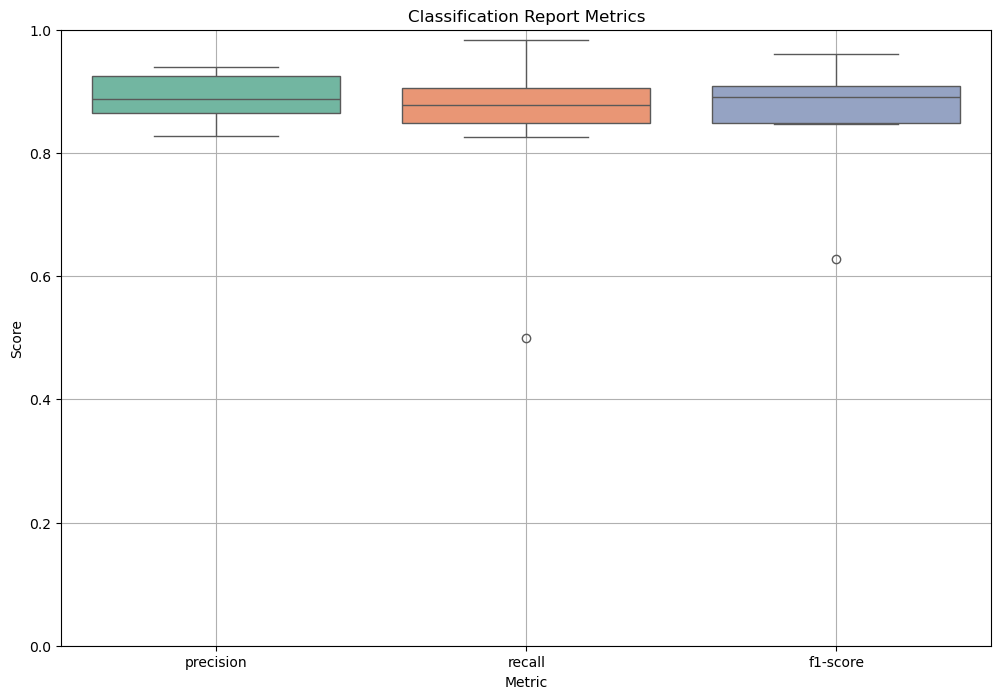

In [46]:
X = df.drop(columns=['GradeClass', 'StudentID'])
y = df['GradeClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=True)
confusion_mat = confusion_matrix(y_test, y_pred)
print(f"Test set accuracy: {test_accuracy}\n")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_mat}\n")
metrics_df = pd.DataFrame(classification_rep).T.iloc[:-1, :-1]
plt.figure(figsize=(12, 8))
metrics_melted = metrics_df.melt(var_name='Metric', value_name='Score')
sns.boxplot(x='Metric', y='Score', data=metrics_melted, hue='Metric', palette='Set2', legend=False)
plt.title('Classification Report Metrics')
plt.ylim(0, 1) 
plt.grid(True)
plt.show()

In [47]:
X = df.drop(columns=['GradeClass', 'StudentID'])
y = df['GradeClass'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted') 
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print(f"Test set accuracy: {test_accuracy}")
print(f"Weighted F1 Score: {f1}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

Test set accuracy: 0.9144050104384134
Weighted F1 Score: 0.9113341085413221

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.50      0.63        22
         1.0       0.83      0.88      0.85        49
         2.0       0.94      0.87      0.90        85
         3.0       0.89      0.90      0.89        86
         4.0       0.94      0.98      0.96       237

    accuracy                           0.91       479
   macro avg       0.89      0.83      0.85       479
weighted avg       0.91      0.91      0.91       479


Confusion Matrix:
 [[ 11   4   3   2   2]
 [  1  43   0   1   4]
 [  1   2  74   4   4]
 [  0   2   2  77   5]
 [  0   1   0   3 233]]


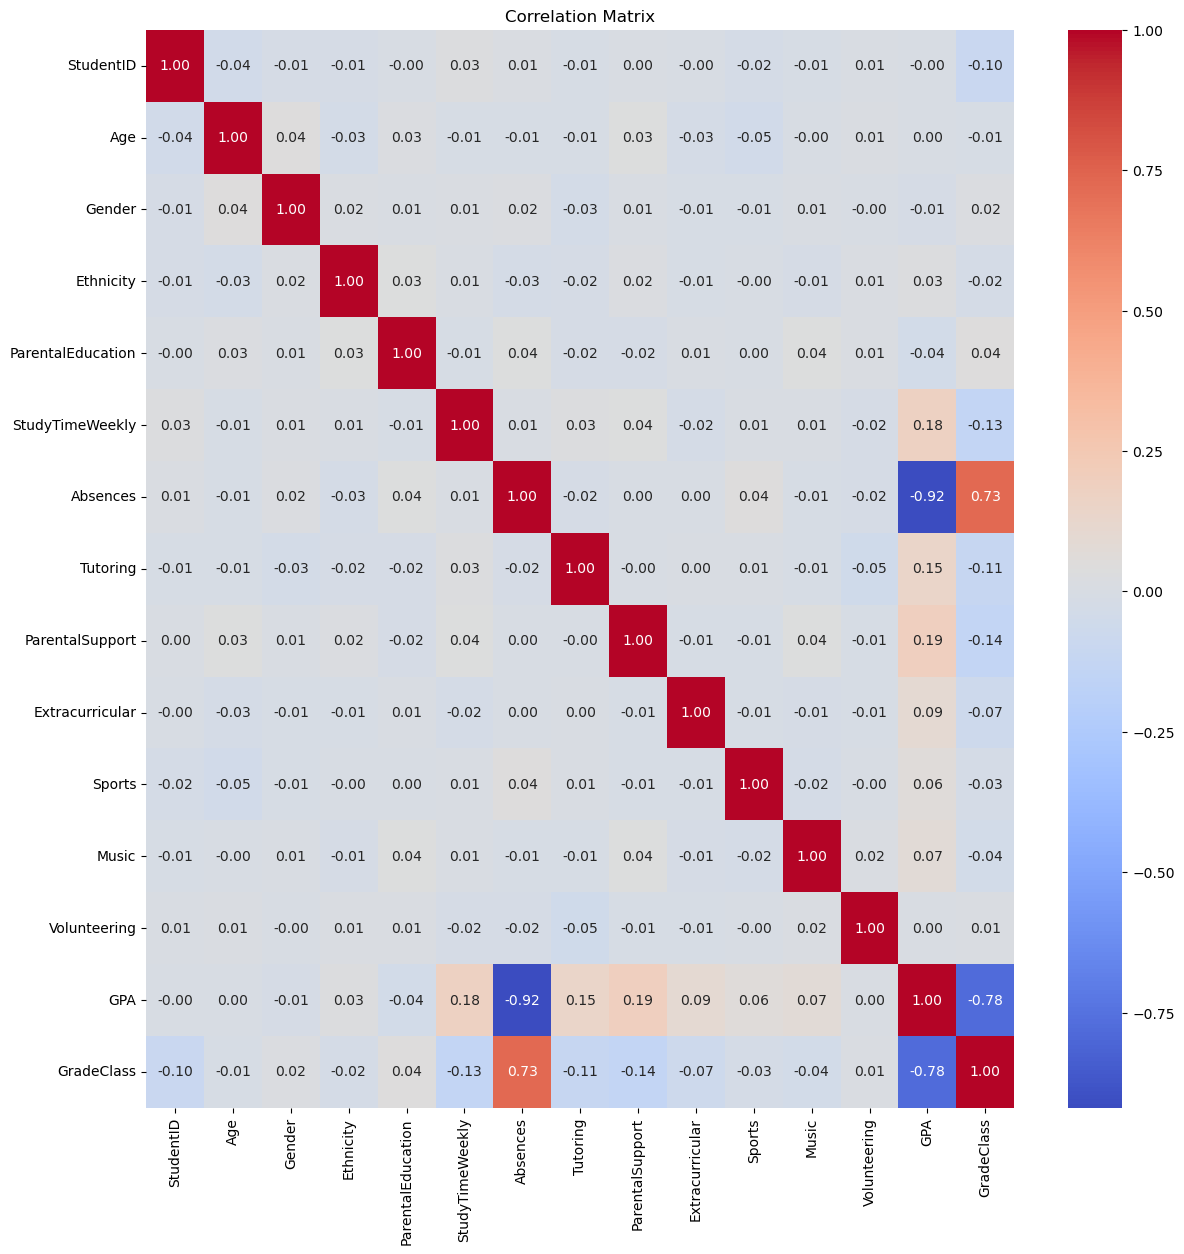

In [48]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

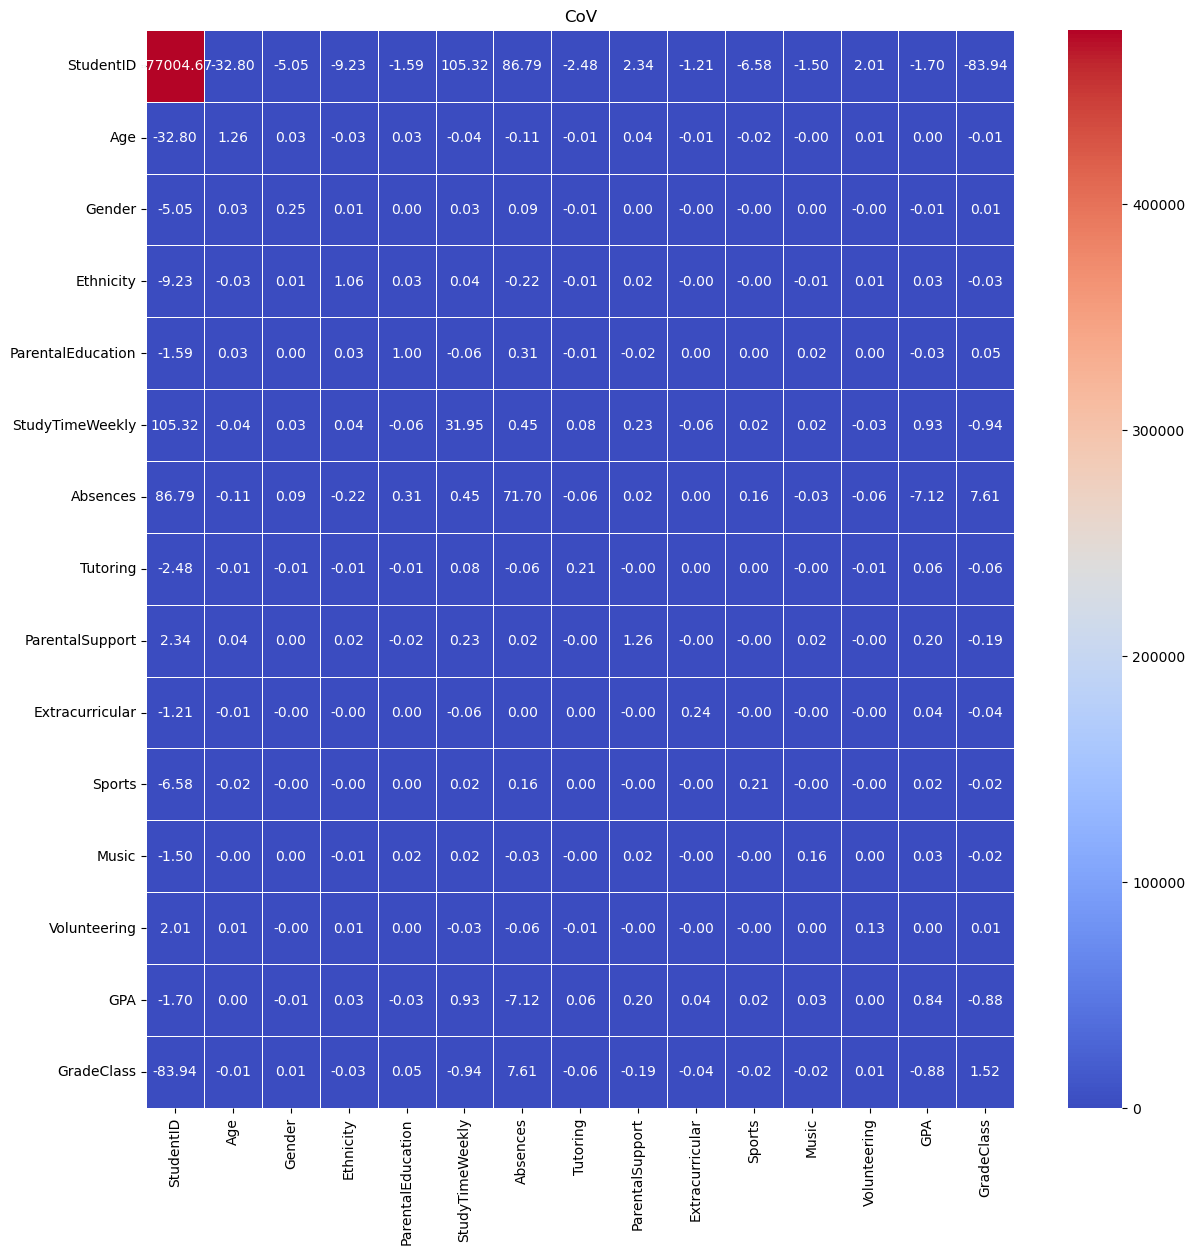

In [49]:
cov_matrix = df.cov()
plt.figure(figsize=(14, 14))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('CoV')
plt.show()